<a href="https://colab.research.google.com/github/dewi-stack/PCVK_Genap_2023/blob/master/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


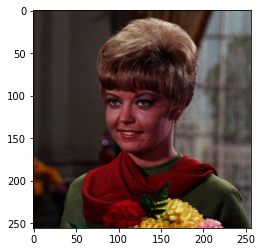

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/PCVK/img/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

#Tugas Praktikum
## 1. Membuat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


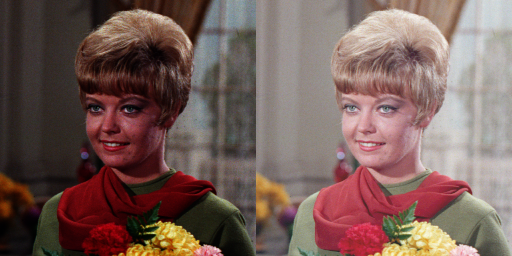

In [ ]:
#1. Membuat Gamma Correction
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

##2. Membuat Simulasi Image Depth

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth [1-7]: 5


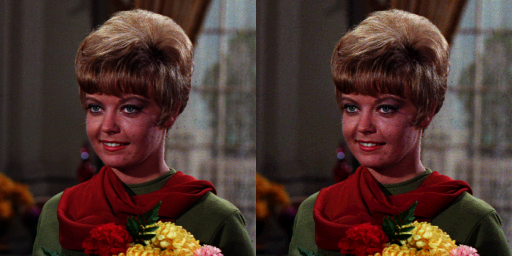

In [ ]:
#2. Membuat simulasi Image Depth
original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth [1-7]: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

##3. Membuat modul Average Denoising

Nilai PSNR adalah 27.539000250840893 (dB)


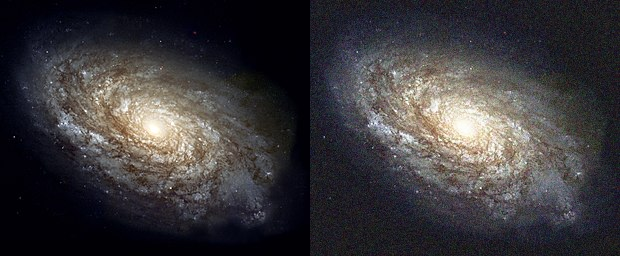

In [8]:
# 3.1 (citra 5)
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK/img/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/img/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.526763562051638 (dB)


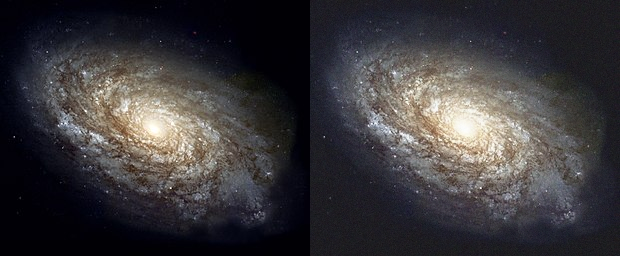

In [9]:
# 3.2 (citra 30)

dst = cv_img[0]
noise_number = 29 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.487547372969388 (dB)


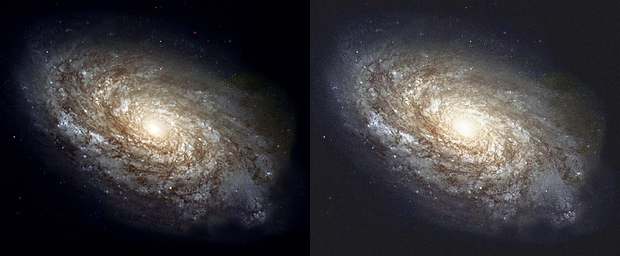

In [10]:
#3.3 (citra 60)

dst = cv_img[0]
noise_number = 59 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.5048261497544 (dB)


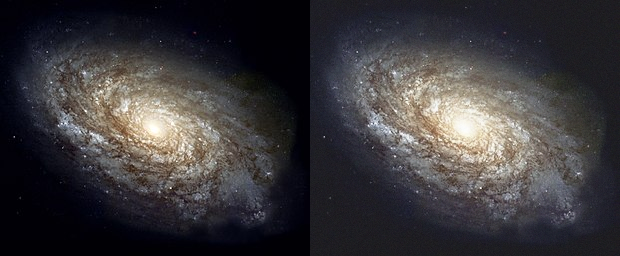

In [11]:
#3.4 (citra 80)

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.505268217321234 (dB)


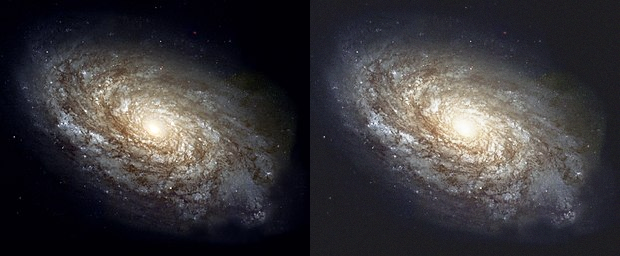

In [12]:
#3.5 (citra 100)

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

##4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya

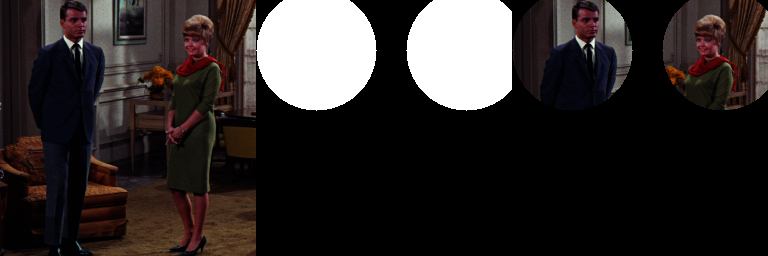

In [58]:
img_couple = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')

mask = np.zeros(img_couple.shape, dtype=np.uint8)
mask = cv.circle(mask, (60, 50), 60, (255,255,255), -1)
mask = cv.circle(mask, (210, 50), 60, (255,255,255), -1)

masked = img_couple & mask

couple_frame = cv.hconcat((img_couple, mask, masked))
cv2_imshow(rose_frame)
     

##5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu. 


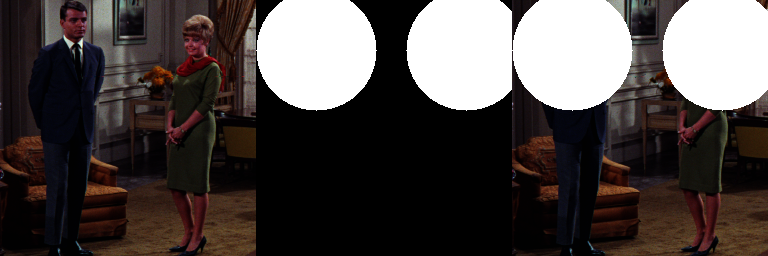

In [60]:
#5.1 (OR)

mask = np.zeros(img_couple.shape, dtype=np.uint8)
mask = cv.circle(mask, (60, 50), 60, (255,255,255), -1)
mask = cv.circle(mask, (210, 50), 60, (255,255,255), -1)

masked = img_couple | mask

couple_frame = cv.hconcat((img_couple, mask, masked))
cv2_imshow(couple_frame)

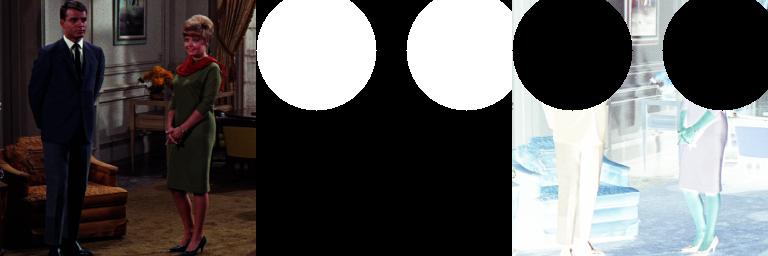

In [61]:
#5.2 (NOT)

mask = np.zeros(img_couple.shape, dtype=np.uint8)
mask = cv.circle(mask, (60, 50), 60, (255,255,255), -1)
mask = cv.circle(mask, (210, 50), 60, (255,255,255), -1)

masked = ~img_couple & ~mask

couple_frame = cv.hconcat((img_couple, mask, masked))
cv2_imshow(couple_frame)

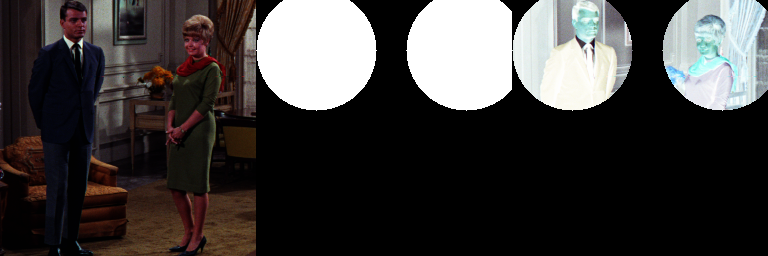

In [62]:
#5.3 (NAND atau NOT AND)

mask = np.zeros(img_couple.shape, dtype=np.uint8)
mask = cv.circle(mask, (60, 50), 60, (255,255,255), -1)
mask = cv.circle(mask, (210, 50), 60, (255,255,255), -1)

masked = ~img_couple & mask

couple_frame = cv.hconcat((img_couple, mask, masked))
cv2_imshow(couple_frame)

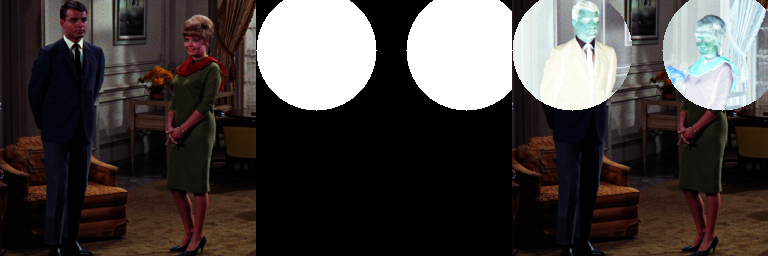

In [63]:
#5.4 (XOR atau Exclusive OR)

mask = np.zeros(img_couple.shape, dtype=np.uint8)
mask = cv.circle(mask, (60, 50), 60, (255,255,255), -1)
mask = cv.circle(mask, (210, 50), 60, (255,255,255), -1)

masked = img_couple ^ mask

couple_frame = cv.hconcat((img_couple, mask, masked))
cv2_imshow(couple_frame)